### Reference

YOLO v5

<a href='https://pytorch.org/hub/ultralytics_yolov5/'>PyTorch docs</a>

<a href='https://github.com/ultralytics/yolov5'>GitHub</a>

<a href='https://github.com/ultralytics/yolov5/blob/master/models/yolov5s.yaml'>Config file example</a>

<a href='https://towardsdatascience.com/the-practical-guide-for-object-detection-with-yolov5-algorithm-74c04aac4843'>Practice Guide</a>

<a href='https://docs.ultralytics.com/yolov5/tutorials/transfer_learning_with_frozen_layers/'>Transfer Learning</a>

YOLO v8

<a href='https://docs.ultralytics.com/yolov5/tutorials/train_custom_data/#11-create-datasetyaml'>Quick Start</a>


<a href='https://docs.ultralytics.com/modes/train/'>Modes</a>

<a href='https://docs.ultralytics.com/usage/cfg/'>Configuration</a>

<a href='https://docs.ultralytics.com/datasets/detect/'>Yolo Dataset Format</a>

<a href='https://www.freecodecamp.org/news/how-to-detect-objects-in-images-using-yolov8/'>Practice Guide</a>

<a href='https://github.com/ultralytics/ultralytics/blob/main/docs/models/yolov8.md'>GitHub</a>


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mapping_id_dict = mapping_id.to_dict()['id']
mapping_id_dict

In [ ]:
mapping_id_dict_rev = {value:key for (key,value) in mapping_id_dict.items()}
mapping_id_dict_rev

In [ ]:
person_id['person_id'] = person_id['person_id'].map(mapping_id_dict_rev)
person_id.head()

,image_id,person_id
51,000052.jpg,51
95,000096.jpg,55
113,000114.jpg,64
115,000116.jpg,57
130,000131.jpg,61


In [ ]:
mapping_id_dict = mapping_id.to_dict()['id']
mapping_id_dict

In [ ]:
mapping_id_dict_rev = {value:key for (key,value) in mapping_id_dict.items()}
mapping_id_dict_rev

In [ ]:
person_id['person_id'] = person_id['person_id'].map(mapping_id_dict_rev)
person_id.head()

,image_id,person_id
51,000052.jpg,51
95,000096.jpg,55
113,000114.jpg,64
115,000116.jpg,57
130,000131.jpg,61


In [ ]:
mapping_id_dict = mapping_id.to_dict()['id']
mapping_id_dict

In [ ]:
mapping_id_dict_rev = {value:key for (key,value) in mapping_id_dict.items()}
mapping_id_dict_rev

In [ ]:
person_id['person_id'] = person_id['person_id'].map(mapping_id_dict_rev)
person_id.head()

,image_id,person_id
51,000052.jpg,51
95,000096.jpg,55
113,000114.jpg,64
115,000116.jpg,57
130,000131.jpg,61


In [ ]:
mapping_id_dict = mapping_id.to_dict()['id']
mapping_id_dict

In [ ]:
mapping_id_dict_rev = {value:key for (key,value) in mapping_id_dict.items()}
mapping_id_dict_rev

In [ ]:
person_id['person_id'] = person_id['person_id'].map(mapping_id_dict_rev)
person_id.head()

,image_id,person_id
51,000052.jpg,51
95,000096.jpg,55
113,000114.jpg,64
115,000116.jpg,57
130,000131.jpg,61


In [ ]:
!pip install -q split-folders

In [ ]:
import os
import time
from tqdm.notebook import tqdm

# download data
import cv2
from PIL import Image
from pathlib import Path
import splitfolders

# from efficientnet_pytorch import EfficientNet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler

from torch.utils.data import DataLoader

import torchvision
from torchvision import datasets, models, transforms, datapoints
from torchvision.datasets import ImageFolder
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.v2 import functional as FT

/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

In [ ]:
# Проверим доступность GPU на CUDA
torch.cuda.is_available()
use_gpu = torch.cuda.is_available()
use_gpu

True

In [ ]:
# Добавим cuda на девайс
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cuda'

In [ ]:
# celeba images popular celeba archive
!gdown 14mLnAajg2gNs3aytQy-iKnVLHQRZ6-C_ -O /content/celeba/

# identity person
!gdown 1ZEKVXe54rFwI2vPgCKDGE-d0BJWZ2NDp -O /content/celeba/

# image attributes
!gdown 1Upj8NyGp7nGoslEuQHirfjYFHA37PJCa -O /content/celeba/

# image bbox
!gdown 1Tvpz-ZHeYpwhe16_QJwUCjY416d9z-ar -O /content/celeba/


Downloading...
From: https://drive.google.com/uc?id=14mLnAajg2gNs3aytQy-iKnVLHQRZ6-C_
To: /content/celeba/img_celeba_popular.zip
100% 250M/250M [00:09<00:00, 25.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZEKVXe54rFwI2vPgCKDGE-d0BJWZ2NDp
To: /content/celeba/identity_CelebA.txt
100% 3.42M/3.42M [00:00<00:00, 147MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Upj8NyGp7nGoslEuQHirfjYFHA37PJCa
To: /content/celeba/list_attr_celeba.txt
100% 26.7M/26.7M [00:01<00:00, 20.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Tvpz-ZHeYpwhe16_QJwUCjY416d9z-ar
To: /content/celeba/list_bbox_celeba.txt
100% 6.08M/6.08M [00:00<00:00, 65.2MB/s]


In [ ]:
mkdir -p /content/celeba/images/

In [ ]:
!unzip /content/celeba/img_celeba_popular.zip  -d /content/celeba/images/ &>/dev/null

In [ ]:
os.rename('/content/celeba/images/img_celeba_popular/', '/content/celeba/images/images/')

In [ ]:
ROOT = "/content/celeba/images/"
ALL_IMAGES = list(Path(ROOT).glob("**/*.jpg"))
ALL_IMAGES = list(filter(lambda x: not x.name.startswith("."), ALL_IMAGES))
IMAGE_NAMES = list(os.listdir(Path(ROOT)/Path('images')))
print("Number of images:", len(ALL_IMAGES))

INPUT_PATH = '/content/celeba/images'
SPLIT_PATH = '/content/celeba/split'
TEST_PATH = SPLIT_PATH / Path("test")
TRAIN_PATH = SPLIT_PATH / Path("train")
VAL_PATH = SPLIT_PATH / Path("val")

Number of images: 3038


In [ ]:
splitfolders.ratio(
                    INPUT_PATH,
                    SPLIT_PATH,
                    seed=42,
                    ratio=(.8, .1, .1),
                    group_prefix=None,
                    move=False
)

Copying files: 3038 files [00:01, 2656.12 files/s]


In [ ]:
def inv_transforms(img):
  inv_transforms = transforms.Compose([ transforms.Normalize(mean = [ 0., 0., 0. ],
                                                     std = [ 1/0.229, 1/0.224, 1/0.225 ]),
                                transforms.Normalize(mean = [ -0.485, -0.456, -0.406 ],
                                                     std = [ 1., 1., 1. ]),
                               ])
  return inv_transforms(img)

In [ ]:
def get_label_names(labels, label_names):
  labels = labels.cpu().tolist()
  return [label_names[x] for x in labels]

In [ ]:
def show_preds(image, prediction=None, threshold=None):
  if prediction is not None and threshold is not None:
    img = inv_transforms(image)
    img = FT.convert_dtype(img, torch.uint8)
    boxes = prediction['boxes'][prediction['scores'] > CONF_THRESH]
    label = prediction['labels'][prediction['scores'] > CONF_THRESH]
  elif prediction is not None and threshold is None:
    img = inv_transforms(image)
    img = FT.convert_dtype(img, torch.uint8)
    boxes = prediction
    label = torch.tensor([1])
  else:
    img = inv_transforms(image[0])
    img = FT.convert_dtype(img, torch.uint8)
    boxes = image[1]['boxes']
    label = image[1]['labels']
  label = get_label_names(label, label_names)
  annotated_image = draw_bounding_boxes(img, boxes, labels=label, colors="red", width=1)
  fig, ax = plt.subplots()
  ax.imshow(annotated_image.permute(1, 2, 0).cpu().numpy())
  ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
  fig.tight_layout()
  fig.show()

In [ ]:
bbox_celeba = pd.read_csv('/content/celeba/list_bbox_celeba.txt', delim_whitespace=True, header=1)
bbox_celeba.head()
# x_1 and y_1 represent the upper left point coordinate of bounding box.
bbox_celeba.head()

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [ ]:
bbox_celeba = bbox_celeba[bbox_celeba['image_id'].isin(IMAGE_NAMES)]
bbox_celeba.shape

(3038, 5)

In [ ]:
bbox_celeba['x_center'] = bbox_celeba['x_1'] + bbox_celeba['width'] / 2
bbox_celeba['y_center'] = bbox_celeba['y_1'] + bbox_celeba['height'] / 2
bbox_celeba.head()

,image_id,x_1,y_1,width,height,x_center,y_center
51,000052.jpg,135,159,333,461,301.5,389.5
95,000096.jpg,322,110,330,457,487.0,338.5
113,000114.jpg,157,62,182,252,248.0,188.0
115,000116.jpg,111,74,187,259,204.5,203.5
130,000131.jpg,43,75,151,209,118.5,179.5


In [ ]:
bbox_celeba = bbox_celeba[['image_id', 'x_center', 'y_center', 'width', 'height']]
bbox_celeba.head()

,image_id,x_center,y_center,width,height
51,000052.jpg,301.5,389.5,333,461
95,000096.jpg,487.0,338.5,330,457
113,000114.jpg,248.0,188.0,182,252
115,000116.jpg,204.5,203.5,187,259
130,000131.jpg,118.5,179.5,151,209


In [ ]:
bbox_celeba = bbox_celeba.reset_index(drop=True)
bbox_celeba.head()

,image_id,x_center,y_center,width,height
0,000052.jpg,301.5,389.5,333,461
1,000096.jpg,487.0,338.5,330,457
2,000114.jpg,248.0,188.0,182,252
3,000116.jpg,204.5,203.5,187,259
4,000131.jpg,118.5,179.5,151,209


In [ ]:
bbox_celeba['img_width'] = 0
bbox_celeba['img_height'] = 0

ALL_IMAGES = sorted(ALL_IMAGES)
for i, path in enumerate(ALL_IMAGES):
  img = Image.open(path)
  bbox_celeba['img_width'][i] = img.size[0]
  bbox_celeba['img_height'][i] = img.size[1]

<ipython-input-48-7cd969069bea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbox_celeba['img_width'][i] = img.size[0]
<ipython-input-48-7cd969069bea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bbox_celeba['img_height'][i] = img.size[1]


In [ ]:
bbox_celeba.head()

,image_id,x_center,y_center,width,height,img_width,img_height
0,000052.jpg,301.5,389.5,333,461,800,800
1,000096.jpg,487.0,338.5,330,457,1024,768
2,000114.jpg,248.0,188.0,182,252,594,499
3,000116.jpg,204.5,203.5,187,259,405,537
4,000131.jpg,118.5,179.5,151,209,300,300


In [ ]:
bbox_celeba['x_center_norm'] = bbox_celeba['x_center'] / bbox_celeba['img_width']
bbox_celeba['y_center_norm'] = bbox_celeba['y_center'] / bbox_celeba['img_height']
bbox_celeba['width_norm'] = bbox_celeba['width'] / bbox_celeba['img_width']
bbox_celeba['height_norm'] = bbox_celeba['height'] / bbox_celeba['img_height']
bbox_celeba.head()

,image_id,x_center,y_center,width,height,img_width,img_height,x_center_norm,y_center_norm,width_norm,height_norm
0,000052.jpg,301.5,389.5,333,461,800,800,0.376875,0.486875,0.416250,0.576250
1,000096.jpg,487.0,338.5,330,457,1024,768,0.475586,0.440755,0.322266,0.595052
2,000114.jpg,248.0,188.0,182,252,594,499,0.417508,0.376754,0.306397,0.505010
3,000116.jpg,204.5,203.5,187,259,405,537,0.504938,0.378957,0.461728,0.482309
4,000131.jpg,118.5,179.5,151,209,300,300,0.395000,0.598333,0.503333,0.696667


In [ ]:
bbox_celeba = bbox_celeba[['image_id', 'x_center_norm', 'y_center_norm', 'width_norm', 'height_norm']]
bbox_celeba.head()

,image_id,x_center_norm,y_center_norm,width_norm,height_norm
0,000052.jpg,0.376875,0.486875,0.416250,0.576250
1,000096.jpg,0.475586,0.440755,0.322266,0.595052
2,000114.jpg,0.417508,0.376754,0.306397,0.505010
3,000116.jpg,0.504938,0.378957,0.461728,0.482309
4,000131.jpg,0.395000,0.598333,0.503333,0.696667


In [ ]:
image_names = sorted(os.listdir(TRAIN_PATH / Path("images")))
image_names[:3]

['000052.jpg', '000116.jpg', '000131.jpg']

In [ ]:
len(image_names)

2430

In [ ]:
val_image_names = sorted(os.listdir(VAL_PATH / Path("images")))
val_image_names[:3]

['000096.jpg', '000255.jpg', '000867.jpg']

In [ ]:
len(val_image_names)

303

In [ ]:
mkdir -p /content/celeba/split/train/labels/

In [ ]:
mkdir -p /content/celeba/split/val/labels/

In [ ]:
person_id = pd.read_csv('/content/celeba/identity_CelebA.txt', names=['image_id', 'person_id'], sep=' ')
person_id = person_id[person_id['image_id'].isin(IMAGE_NAMES)]
person_id.head()

,image_id,person_id
51,000052.jpg,3896
95,000096.jpg,4262
113,000114.jpg,7256
115,000116.jpg,4887
130,000131.jpg,7222


In [ ]:
unique_id = person_id['person_id'].unique()
unique_id.sort()
unique_id

array([1574, 1578, 1580, 1581, 1582, 1585, 1628, 1633, 1634, 1639, 1641,
       1642, 1646, 1648, 1649, 1651, 1657, 1660, 1664, 1672, 1673, 1675,
       1686, 1689, 1691, 1696, 1698, 1700, 1708, 1757, 2114, 2820, 3227,
       3699, 3745, 3782, 3845, 3846, 3847, 3853, 3854, 3857, 3858, 3859,
       3862, 3864, 3875, 3880, 3882, 3886, 3895, 3896, 3901, 3941, 4126,
       4262, 4740, 4887, 4978, 5774, 6568, 7222, 7226, 7228, 7256, 7260,
       7261, 7265, 7271, 7275, 7282, 7286, 7294, 7302, 8850, 8853, 8854,
       8856, 8858, 8860, 8861, 8867, 8868, 8875, 8876, 8878, 8879, 8880,
       8882, 8887, 8891, 8896, 8898, 8931, 8932, 8933, 8968, 9152, 9256,
       9840])

In [ ]:
mapping_id = pd.DataFrame(unique_id, columns=['id'])
mapping_id.tail()

,id
95,8933
96,8968
97,9152
98,9256
99,9840


In [ ]:
mapping_id_dict = mapping_id.to_dict()['id']
mapping_id_dict

In [ ]:
mapping_id_dict_rev = {value:key for (key,value) in mapping_id_dict.items()}
mapping_id_dict_rev

In [ ]:
person_id['person_id'] = person_id['person_id'].map(mapping_id_dict_rev)
person_id.head()

,image_id,person_id
51,000052.jpg,51
95,000096.jpg,55
113,000114.jpg,64
115,000116.jpg,57
130,000131.jpg,61


In [ ]:
bbox_celeba = bbox_celeba.merge(person_id, on='image_id', how='left')
bbox_celeba.head()

,image_id,x_center_norm,y_center_norm,width_norm,height_norm,person_id
0,000052.jpg,0.376875,0.486875,0.416250,0.576250,51
1,000096.jpg,0.475586,0.440755,0.322266,0.595052,55
2,000114.jpg,0.417508,0.376754,0.306397,0.505010,64
3,000116.jpg,0.504938,0.378957,0.461728,0.482309,57
4,000131.jpg,0.395000,0.598333,0.503333,0.696667,61


In [ ]:
bbox_celeba[['image_id', 'person_id']].groupby(['person_id']).count().sort_values('image_id', ascending=False)

,image_id
person_id,
35,35
32,35
31,35
34,34
33,34
...,...
36,30
28,30
27,30


In [ ]:
bbox_celeba['person_id'].nunique()

100

In [ ]:
bbox_celeba = bbox_celeba[['image_id', 'person_id', 'x_center_norm', 'y_center_norm', 'width_norm', 'height_norm']]
bbox_celeba.head()

,image_id,person_id,x_center_norm,y_center_norm,width_norm,height_norm
0,000052.jpg,51,0.376875,0.486875,0.416250,0.576250
1,000096.jpg,55,0.475586,0.440755,0.322266,0.595052
2,000114.jpg,64,0.417508,0.376754,0.306397,0.505010
3,000116.jpg,57,0.504938,0.378957,0.461728,0.482309
4,000131.jpg,61,0.395000,0.598333,0.503333,0.696667


In [ ]:
train_data = bbox_celeba[bbox_celeba['image_id'].isin(image_names)]
val_data = bbox_celeba[bbox_celeba['image_id'].isin(val_image_names)]
val_data.head()

,image_id,person_id,x_center_norm,y_center_norm,width_norm,height_norm
1,000096.jpg,55,0.475586,0.440755,0.322266,0.595052
6,000255.jpg,8,0.532500,0.439441,0.715000,0.614907
14,000867.jpg,22,0.486250,0.245000,0.357500,0.330000
22,001397.jpg,94,0.518085,0.308081,0.338298,0.370370
32,001941.jpg,66,0.480469,0.230469,0.177734,0.246094


In [ ]:
train_data = train_data.drop(['image_id'], axis=1)
val_data = val_data.drop(['image_id'], axis=1)
val_data.head()

,person_id,x_center_norm,y_center_norm,width_norm,height_norm
1,55,0.475586,0.440755,0.322266,0.595052
6,8,0.532500,0.439441,0.715000,0.614907
14,22,0.486250,0.245000,0.357500,0.330000
22,94,0.518085,0.308081,0.338298,0.370370
32,66,0.480469,0.230469,0.177734,0.246094


In [ ]:
for name, i in zip(image_names, range(len(train_data))):
  pd.DataFrame(train_data.iloc[i]).transpose().to_csv(f'/content/celeba/split/train/labels/{name[:6]}.txt', header=False, sep=' ', index=False)

In [ ]:
for name, i in zip(val_image_names, range(len(val_data))):
  pd.DataFrame(val_data.iloc[i]).transpose().to_csv(f'/content/celeba/split/val/labels/{name[:6]}.txt', header=False, sep=' ', index=False)

### CONFIG MODEL

In [ ]:
%%bash
pip install -U ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.6/612.6 kB 31.4 MB/s eta 0:00:00


In [ ]:
# yolo v5
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:04<00:00, 20.7MB/s]


In [ ]:
model

### TRAIN

In [ ]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# all params: https://docs.ultralytics.com/modes/train/#arguments
model.train(
   data='/content/drive/MyDrive/Colab Notebooks/dataset_n_classes.yaml',
   epochs=50,
   batch=16,
   name='yolov8_custom_n_classes',
   save=True,
   save_period=10,
   device=DEVICE)

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/Colab Notebooks/dataset_n_classes.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=cuda, workers=8, project=None, name=yolov8_custom_n_classes, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscr

### PREDICT

In [ ]:
result = model.predict('/content/celeba/split/test/images/')


image 1/305 /content/celeba/split/test/images/000114.jpg: 544x640 1 class_64, 58.3ms
image 2/305 /content/celeba/split/test/images/000724.jpg: 640x448 1 class_67, 64.7ms
image 3/305 /content/celeba/split/test/images/000838.jpg: 640x448 1 class_82, 1 class_83, 32.3ms
image 4/305 /content/celeba/split/test/images/001553.jpg: 640x448 1 class_31, 32.0ms
image 5/305 /content/celeba/split/test/images/001727.jpg: 640x320 1 class_5, 1 class_61, 62.2ms
image 6/305 /content/celeba/split/test/images/002872.jpg: 640x448 1 class_53, 26.9ms
image 7/305 /content/celeba/split/test/images/003832.jpg: 512x640 1 class_1, 58.4ms
image 8/305 /content/celeba/split/test/images/005109.jpg: 640x512 1 class_65, 63.7ms
image 9/305 /content/celeba/split/test/images/005503.jpg: 640x448 1 class_49, 27.2ms
image 10/305 /content/celeba/split/test/images/006741.jpg: 640x448 (no detections), 26.4ms
image 11/305 /content/celeba/split/test/images/006833.jpg: 640x448 1 class_65, 26.2ms
image 12/305 /content/celeba/split/

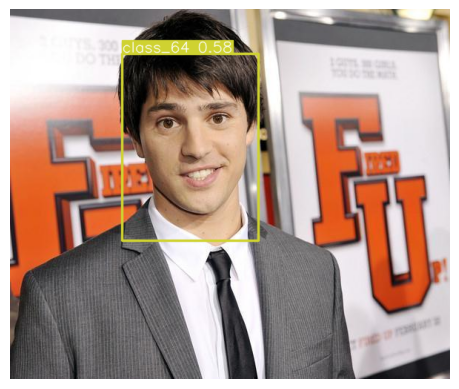

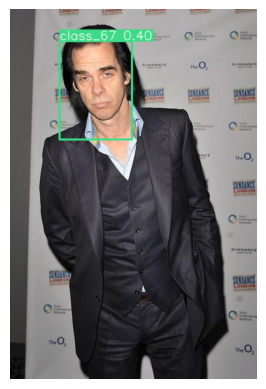

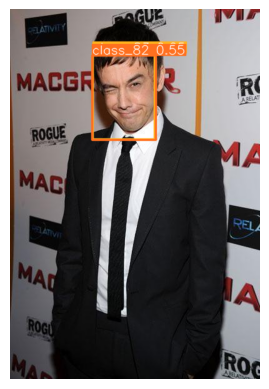

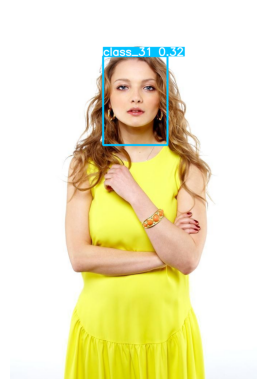

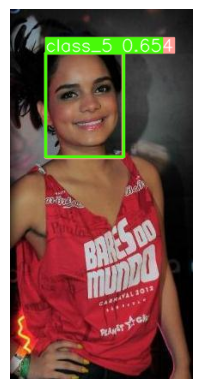

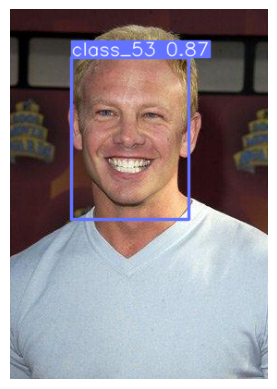

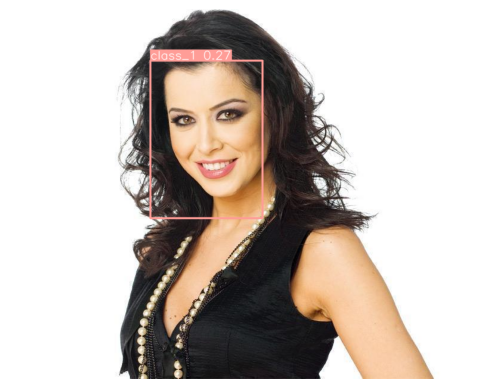

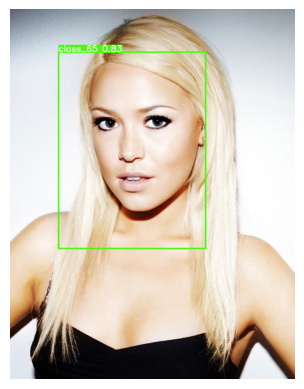

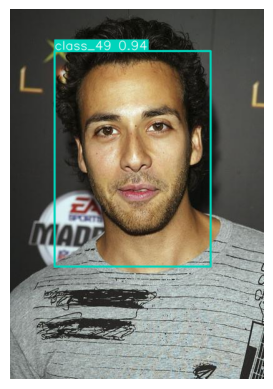

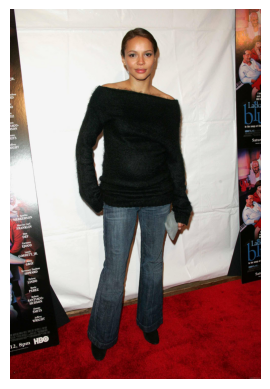

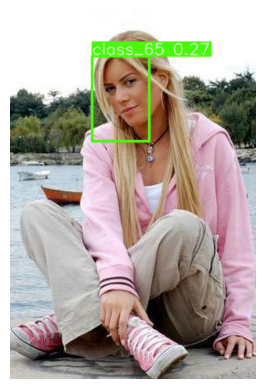

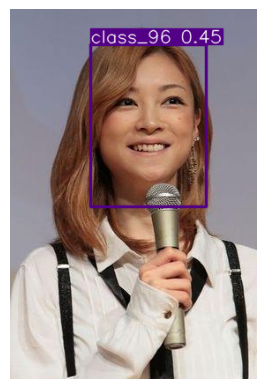

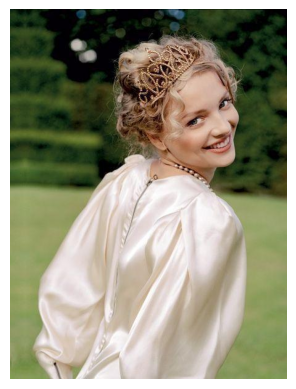

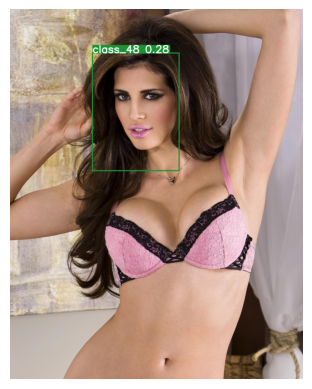

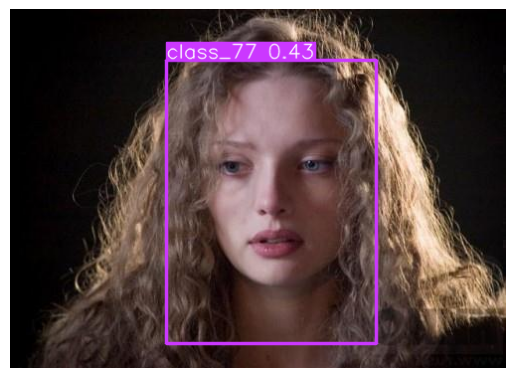

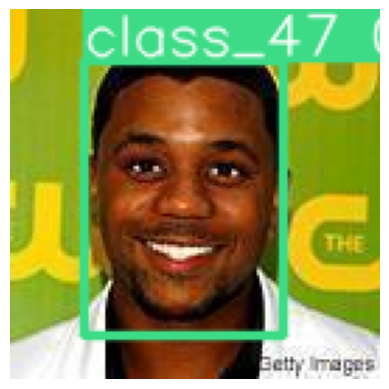

In [ ]:
for res in result[0:16]:
  res_plotted = res.plot()
  plt.imshow(res_plotted[...,::-1])
  plt.axis("off")
  plt.show()

### RESUME TRAINING

In [ ]:
# Load a model
model = YOLO('/content/runs/detect/yolov8_custom_n_classes/weights/last.pt')  # load a partially trained model

# Resume training
model.train(
    resume=True,
    epochs=50,
    batch=16,
    name='yolov8_custom_n_classes',
    save=True,
    save_period=20,
    device=DEVICE
    )

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/yolov8_custom_n_classes2/weights/last.pt, data=/content/drive/MyDrive/Colab Notebooks/dataset_n_classes.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=cuda, workers=8, project=None, name=yolov8_custom_n_classes, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=No

### EVAL

In [ ]:
result

In [ ]:
acc = []

for res in result:
  if res.boxes.cls.shape[0] == 0:
    predict_cls = 10000000
  else:
    predict_cls = int(res.boxes.cls[0])
    predict_cls = mapping_id_dict[predict_cls]

  image_name = res.path[-10:]
  true_class = int(person_id['person_id'][person_id['image_id'] == image_name])
  acc.append(predict_cls == true_class)

print(np.mean(acc))

0.7049180327868853
